In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

workdir = "D://DrugResponsivenessGuideline_log//Dataset//MDC-9K_minmax"

In [2]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario6_MDC-9K_minmax

dataset = np.load(workdir + "//MDC9k_190510_ccle_cell_gdsc_mut_drug_info.npz") # input file
ss0 = np.load(workdir + '//MDC9k_190510_ccle_cell_gdsc_mut_drug_info_r0_9_1.npz') # split for training and test

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(50,100):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

1 1


In [6]:
x.shape

(8727, 23538)

In [7]:
training_image_array.shape

(7855, 23538)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
# train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
# test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
# #input_shape = (img_rows, img_cols, 1)

In [10]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(7855, 23538) (7855,) (872, 23538) (872,)


In [11]:
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [12]:
inds = np.where(np.isnan(test_X))

In [13]:
inds

(array([], dtype=int64), array([], dtype=int64))

In [14]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (7855, 23538)
7855 train samples
872 test samples


In [15]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Fit regression model
svr_lin = SVR(C=0.01)
y_lin = svr_lin.fit(train_X, train_y).predict(test_X)


In [16]:
import matplotlib
from matplotlib import pyplot as plt

In [17]:
y_lin

array([ 1.98357901,  1.87337105,  1.98478652, -0.15881298,  0.64064219,
        1.93113018,  1.90165292,  1.88385298,  1.95992804,  1.98775495,
        1.65869114,  1.93471852,  1.82387133,  1.98579231,  0.40403277,
        1.87536961,  1.97807628,  1.97313653,  1.86941007,  1.85800995,
        1.97166564,  1.97256657,  1.91638509, -0.09717485,  1.98362042,
        1.98505979,  1.96249502,  0.5754802 ,  1.92840624,  0.33873315,
        1.88079038,  1.98729197,  1.98050776,  1.90769177,  1.96846694,
        1.9812553 ,  1.95777767,  1.90310004,  0.40612953,  1.87877469,
        1.97751463,  1.90580254,  1.97390427,  1.83957154,  0.41021194,
        1.96929463,  1.94198139,  1.88536814,  0.41772436,  1.98077629,
        1.98137581,  1.66128035,  1.97872699,  1.89705546,  1.97957753,
        1.98531748,  0.38625841,  1.92632347,  1.97841656,  0.37514943,
        0.3919716 ,  1.95375817,  1.87341295,  0.59809159,  1.88372215,
        1.98426311, -0.06805107,  1.95204123,  1.95309443, -0.09

In [19]:
import pickle
from sklearn.externals import joblib
workdir = "D://DrugResponsivenessGuideline_log//Result//MDC-9K//SVR"
joblib.dump(svr_lin, workdir + '//MDC_9K_minmax_SVR_model.pkl') 


['D://DrugResponsivenessGuideline_log//Result//MDC-9K//SVR//MDC_9K_minmax_SVR_model.pkl']

In [20]:
a = pd.DataFrame(y_lin)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [ ]:
workdir = "E://Ronny_TF//Ronny_IC50_RMSE//method_comparison//190511_ccle_gdsc_mut_drug_info_SVR"
c.to_csv(workdir + '//190511_SVR_ccle_gdsc_mut_drug_info_result.csv')

In [94]:
c

,Predicted,Test
0,1.976846,0.941970
1,1.782570,0.225864
2,1.982008,1.677600
3,-2.824676,-4.869996
4,-0.583738,-0.246987
5,1.973759,1.729042
6,1.954508,2.079442
7,1.866562,1.510771
8,1.989896,2.079442
9,1.979345,2.079442


In [95]:
c.shape

(872, 2)

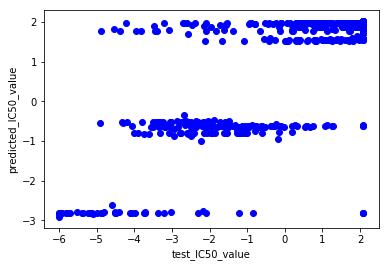

In [96]:
plt.scatter(test_label_array,y_lin,c='blue')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//190511_SVR_ccle_gdsc_mut_drug_info_test_scatterplot.png')

In [97]:
rse = ((test_label_array-y_lin)**2).sum()
mse = np.mean((test_label_array-y_lin)**2)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.3818743048771578
